# FWHM vs Fermi Chopper frequency -- Chopper 2

Here we tried fitting Fermi chopper parameters to better agree with the vanadium data
but it seems the improvement is not much.

In [1]:
cd ~/dv/sns-chops/resolution/ARCS/PyChop/

/SNS/users/lj7/dv/sns-chops/resolution/ARCS/PyChop


In [2]:
import numpy as np, os, sys, glob
from matplotlib import pyplot as plt

In [3]:
%matplotlib notebook

Exp data

In [4]:
import Vdata2018
reload(Vdata2018)

<module 'Vdata2018' from 'Vdata2018.pyc'>

In [5]:
# expdata = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_FC1_2018.dat'))
expdata = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_FC2_2018_v2.dat'))

reading data. please wait...
  done


In [6]:
unique_nominal_Eis = set( list(expdata.Ei_list)) 

In [7]:
# unique_nominal_Eis

In [8]:
Ei = 100.

In [9]:
condition = np.isclose(expdata.vdata.Energy, Ei)

In [10]:
expdata.vdata.RunNumber[condition]

13     108045.0
32     108064.0
69     108101.0
82     108114.0
106    108138.0
119    108151.0
137    108169.0
152    108184.0
174    107983.0
198    108007.0
217    108026.0
Name: RunNumber, dtype: float64

In [11]:
expdata.chopper_freqs[condition]

array([ 180.,  240.,  300.,  360.,  420.,  480.,  540.,  600.,   60.,
         60.,  120.])

In [12]:
expdata.FWHM[condition]

13      5.729815
32      5.429840
69      5.409299
82      5.303469
106     4.802037
119     4.497425
137     4.297652
152     3.992069
174    84.300000
198    25.984642
217    11.874494
Name: Sigma, dtype: float64

<IPython.core.display.Javascript object>


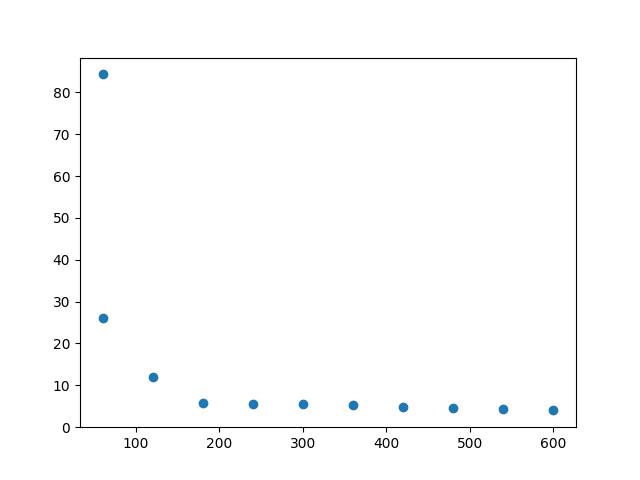

In [13]:
plt.figure()
freqs = expdata.chopper_freqs[condition]
plt.plot(freqs, expdata.FWHM[condition], 'o')

PyChop

In [14]:
sys.path.insert(0, "/SNS/users/lj7/dv")

In [15]:
from PyChop import PyChop2

In [24]:
def FWHM_pychop(
    fc_freq,
    E=0, 
    aperture_width=0.1751, S1=281., S2=79., B1=0.087, B2=0.4, Emod=172., 
    Ei = 100.,
    fc_pslit = 1.5, fc_pslat = 0.41, fc_radius=50., fc_rho = 580.,
    fc_choice='ARCS-100-1.5-SMI'):
    
    template = open('./arcs-opt-template.yaml').read()
    content = template.format(aperture_width=aperture_width)
    optyaml = 'arcs-opt.yaml'
    with open(optyaml, 'wt') as of:
        of.write(content)
    instrument = PyChop2(optyaml, fc_choice, fc_freq)
    instrument.ei = Ei
    instrument.moderator.mod_pars = [S1, S2, B1, B2, Emod]
    # print instrument.moderator.mod_pars

    fc = instrument.chopper_system.packages[fc_choice]
    fc.pslit = fc_pslit
    fc.pslat = fc_pslat
    fc.radius = fc_radius
    fc.rho = fc_rho
    res = instrument.getResolution(E)
    ret = res[0]
    # if not np.isfinite(ret):
    #    ret = 0.
    return ret

In [25]:
from PyChop import Chop
reload(Chop)

<module 'PyChop.Chop' from '/SNS/users/lj7/dv/PyChop/Chop.pyc'>

In [ ]:
res = [FWHM_pychop(E=0., fc_freq=f) for f in freqs]
plt.figure()
plt.plot(freqs, res, '+', label='pychop')
plt.plot(freqs, expdata.FWHM[condition], 'o', mfc='none', label='exp')
plt.ylim(3, 6.5)
plt.legend()

# Try plotting more Eis

In [27]:
def getExpXY(Ei):
    "return freq, FWHM"
    condition = np.isclose(expdata.vdata.Energy, Ei)
    x = expdata.chopper_freqs[condition]
    y = expdata.FWHM[condition]
    return x,y

/SNS/users/lj7/dv/PyChop/Chop.py:54: UserWarning: PyChop: tchop(): No transmission at 100.000 meV at 180 Hz
  warnings.warn('PyChop: tchop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq))
/SNS/users/lj7/dv/PyChop/Chop.py:54: UserWarning: PyChop: tchop(): No transmission at 100.000 meV at  60 Hz
  warnings.warn('PyChop: tchop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq))
/SNS/users/lj7/dv/PyChop/Chop.py:54: UserWarning: PyChop: tchop(): No transmission at 100.000 meV at  60 Hz
  warnings.warn('PyChop: tchop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq))
/SNS/users/lj7/dv/PyChop/Chop.py:54: UserWarning: PyChop: tchop(): No transmission at 100.000 meV at 120 Hz
  warnings.warn('PyChop: tchop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq))


<IPython.core.display.Javascript object>


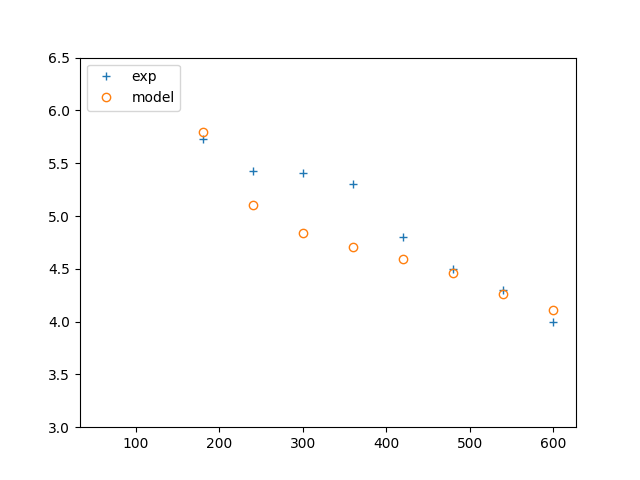

In [28]:
Ei = 100
freqs, expFWHM = getExpXY(Ei)
modelFWHM = [FWHM_pychop(E=0., fc_freq=f) for f in freqs]

plt.figure()
plt.plot(freqs, expFWHM, '+', label='exp')
plt.plot(freqs, modelFWHM, 'o', mfc='none', label='model')
plt.ylim(3, 6.5)
plt.legend()

In [29]:
set(expdata.vdata.Energy)

{8.0,
 10.0,
 12.0,
 15.0,
 20.0,
 25.0,
 30.0,
 40.0,
 50.0,
 60.0,
 70.0,
 80.0,
 90.0,
 100.0,
 125.0,
 150.0,
 200.0,
 250.0,
 300.0,
 400.0,
 500.0,
 600.0}

<IPython.core.display.Javascript object>


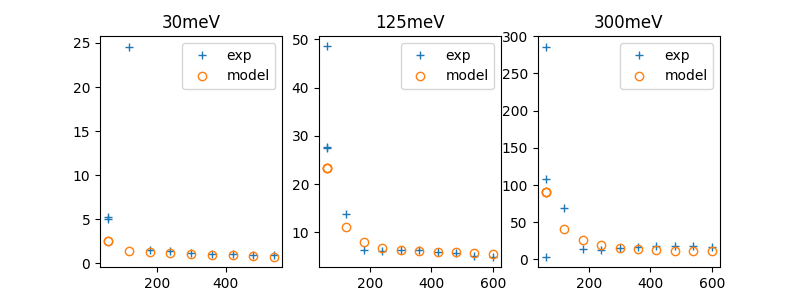

/SNS/users/lj7/dv/PyChop/Chop.py:54: UserWarning: PyChop: tchop(): No transmission at 30.000 meV at  60 Hz
  warnings.warn('PyChop: tchop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq))
/SNS/users/lj7/dv/PyChop/Chop.py:54: UserWarning: PyChop: tchop(): No transmission at 30.000 meV at  60 Hz
  warnings.warn('PyChop: tchop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq))
/SNS/users/lj7/dv/PyChop/Chop.py:54: UserWarning: PyChop: tchop(): No transmission at 125.000 meV at 180 Hz
  warnings.warn('PyChop: tchop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq))
/SNS/users/lj7/dv/PyChop/Chop.py:54: UserWarning: PyChop: tchop(): No transmission at 125.000 meV at  60 Hz
  warnings.warn('PyChop: tchop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq))
/SNS/users/lj7/dv/PyChop/Chop.py:54: UserWarning: PyChop: tchop(): No transmission at 125.000 meV at  60 Hz
  warnings.warn('PyChop: tchop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq))
/SNS/users/lj7/dv/PyCh

In [30]:
Eilist = [30, 125, 300]
N = len(Eilist)
plt.figure(figsize=(8,3))

for i, Ei in enumerate(Eilist):
    freqs, expFWHM = getExpXY(Ei)
    modelFWHM = [FWHM_pychop(E=0., fc_freq=f, Ei=Ei) for f in freqs]

    plt.subplot(1, N, i+1)
    plt.title('%smeV' % Ei)
    plt.plot(freqs, expFWHM, '+', label='exp')
    plt.plot(freqs, modelFWHM, 'o', mfc='none', label='model')
    # plt.ylim(3, 6.5)
    plt.legend()

These were parameters obtained by fitting to old C4H2I2S data (Res vs E)

<IPython.core.display.Javascript object>


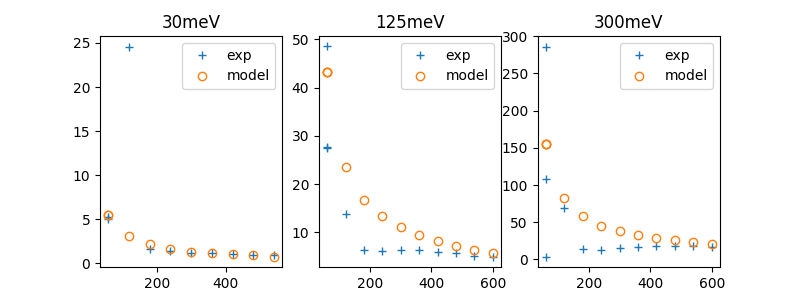

In [32]:
Eilist = [30, 125, 300]
N = len(Eilist)
plt.figure(figsize=(8,3))

opts = dict(
    fc_pslit=        3.63098625,
    S2=              200.000000,
    S1=              600.000000,
    aperture_width=  0.01000086,
    B1=              0.19999951,
    B2=              0.40000000,
    Emod=           100.000000,
)
for i, Ei in enumerate(Eilist):
    freqs, expFWHM = getExpXY(Ei)
    modelFWHM = [FWHM_pychop(E=0., fc_freq=f, Ei=Ei, **opts) for f in freqs]

    plt.subplot(1, N, i+1)
    plt.title('%smeV' % Ei)
    plt.plot(freqs, expFWHM, '+', label='exp')
    plt.plot(freqs, modelFWHM, 'o', mfc='none', label='model')
    # plt.ylim(3, 6.5)
    plt.legend()

# All energies

In [33]:
unique_nominal_Eis

{8.0,
 10.0,
 12.0,
 15.0,
 20.0,
 25.0,
 30.0,
 40.0,
 50.0,
 60.0,
 70.0,
 80.0,
 90.0,
 100.0,
 125.0,
 150.0,
 200.0,
 250.0,
 300.0,
 400.0,
 500.0,
 600.0}

<IPython.core.display.Javascript object>


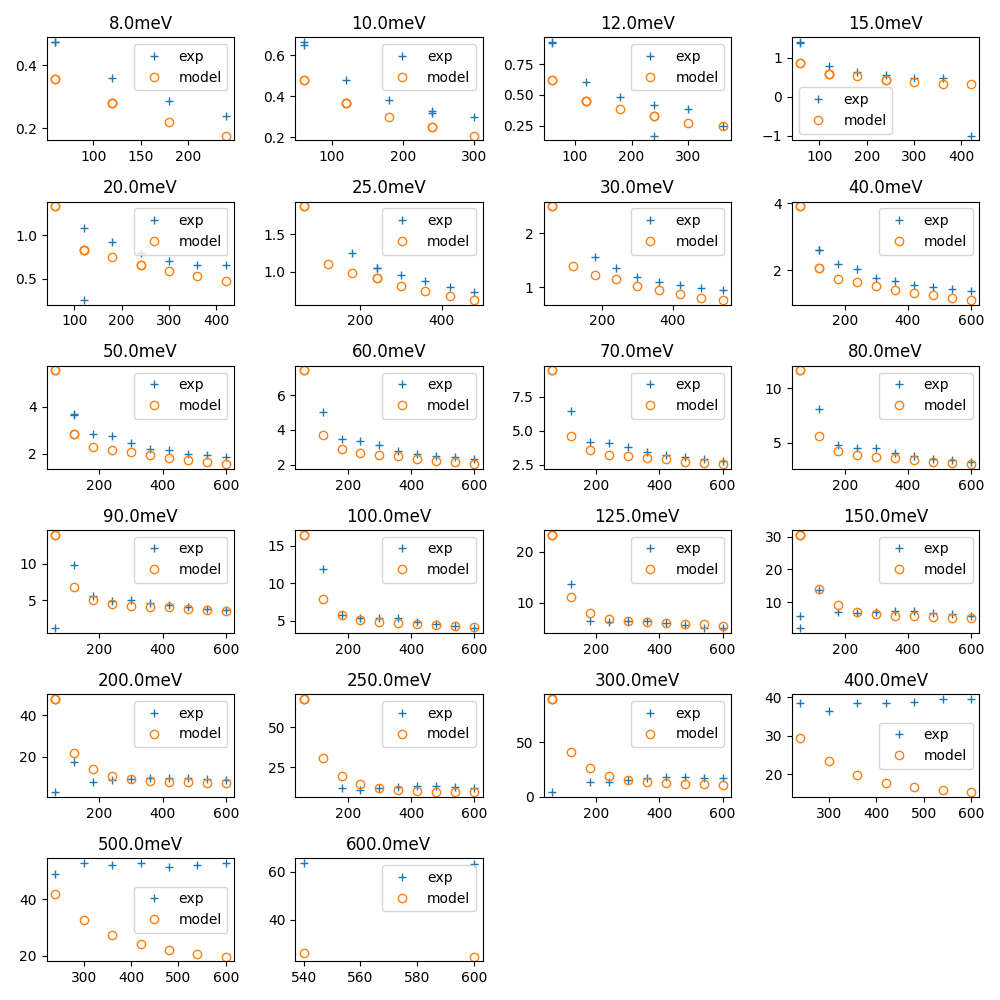

In [34]:
Ei_list = sorted(unique_nominal_Eis)
N = len(Ei_list)
cols = 4
rows = (N-1)//cols + 1
plt.figure(figsize=(10,10))

import warnings
for i, Ei in enumerate(Ei_list):
    freqs, expFWHM = getExpXY(Ei)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        modelFWHM = [FWHM_pychop(E=0., fc_freq=f, Ei=Ei) for f in freqs]

    plt.subplot(rows, cols, i+1)
    plt.title('%smeV' % Ei)
    plt.plot(freqs[expFWHM<Ei*0.12], expFWHM[expFWHM<Ei*0.12], '+', label='exp')
    plt.plot(freqs, modelFWHM, 'o', mfc='none', label='model')
    # plt.ylim(3, 6.5)
    plt.legend()
plt.tight_layout()

# Fit
## Model and data

In [35]:
xs = []
ys = []
for Ei in Ei_list:
    if Ei>300: continue
    freqs, expFWHM = getExpXY(Ei)
    xs += list(freqs[freqs>60.] + Ei*1000)
    ys += list(expFWHM[freqs>60.])
    continue

In [36]:
def FWHMs_pychop2(
    x, 
    aperture_width=0.1751, # S1=281., S2=79., B1=0.087, B2=0.4, Emod=172., 
    fc_pslit = 1.5, fc_pslat = 0.41, fc_radius=50., fc_rho = 580.,
    fc_choice='ARCS-100-1.5-SMI',
):
    Eis = x//1000
    freqs = x%1000
    return [FWHM_pychop(
        fc_freq = freq, E=0, 
        aperture_width=aperture_width, # S1=S1, S2=S2, B1=B1, B2=B2, Emod=Emod, 
        Ei = Ei, fc_pslit = fc_pslit, fc_pslat=fc_pslat, fc_radius=fc_radius, fc_rho=fc_rho,
        fc_choice=fc_choice) for freq, Ei in zip(freqs, Eis)]

In [37]:
ys_model = FWHMs_pychop2(np.array(xs))

<IPython.core.display.Javascript object>


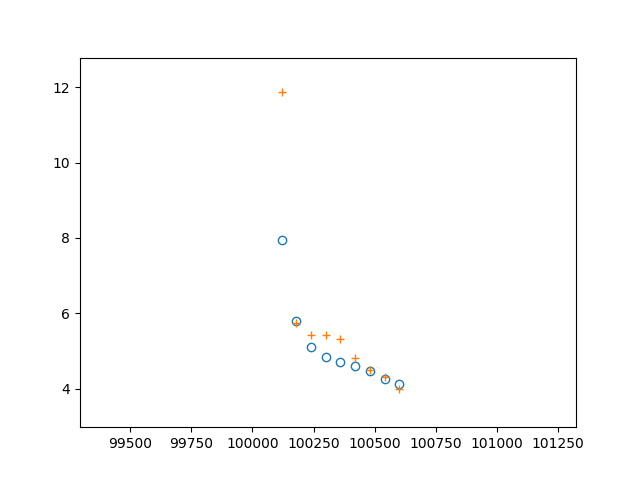

In [38]:
plt.figure()
plt.plot(xs, ys_model, 'o', mfc='none')
plt.plot(xs, ys, '+')

## Fit

In [40]:
import lmfit

took 8 min

In [ ]:
%%time
model = lmfit.Model(FWHMs_pychop2)
params = model.make_params()
fitres = model.fit(data=ys, x=xs)

In [46]:
fitres.init_params

Parameters([('fc_pslit', <Parameter 'fc_pslit', 1.5, bounds=[-inf:inf]>),
            ('fc_radius', <Parameter 'fc_radius', 50.0, bounds=[-inf:inf]>),
            ('aperture_width',
             <Parameter 'aperture_width', 0.1751, bounds=[-inf:inf]>),
            ('fc_rho', <Parameter 'fc_rho', 580.0, bounds=[-inf:inf]>),
            ('fc_pslat', <Parameter 'fc_pslat', 0.41, bounds=[-inf:inf]>)])

In [42]:
fitres.best_values

{'aperture_width': 0.10295800325376014,
 'fc_pslat': 0.40999999999999998,
 'fc_pslit': 8.5242459675547586,
 'fc_radius': 170.16531178334324,
 'fc_rho': 995.7147106571515}

<IPython.core.display.Javascript object>


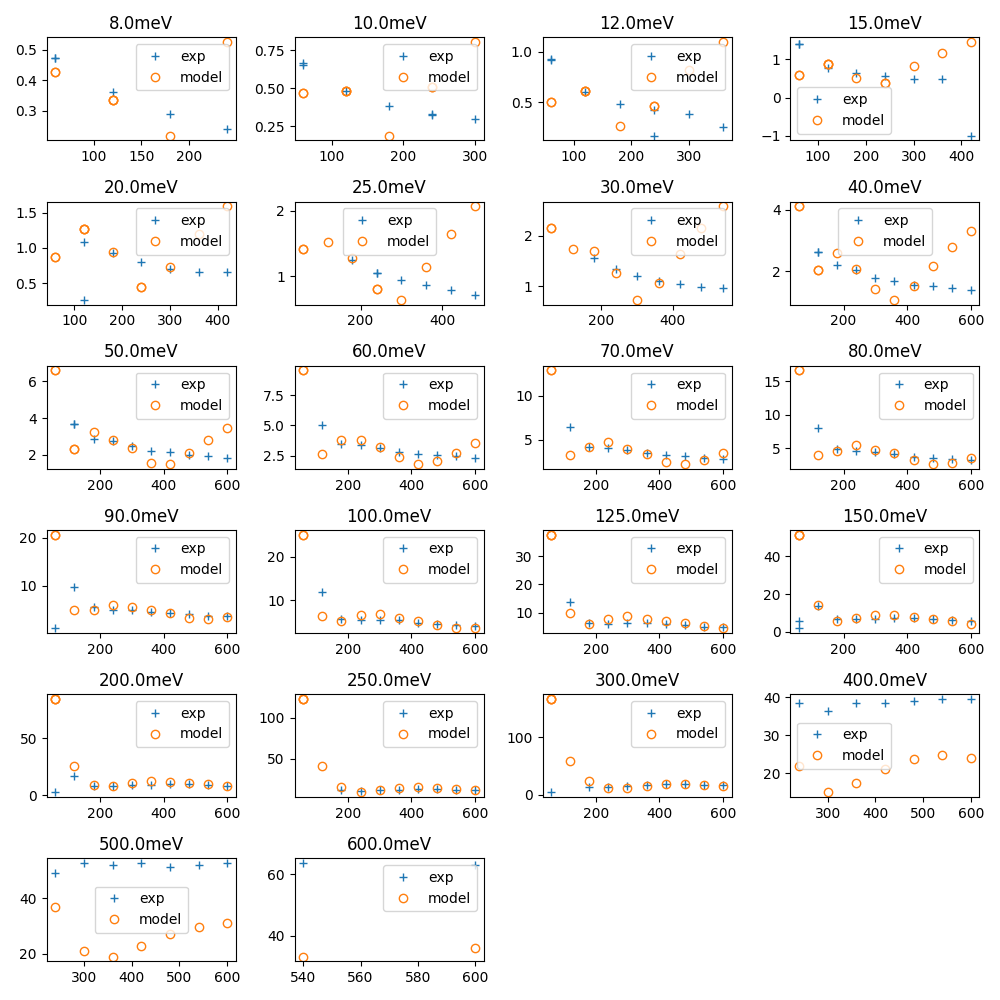

In [44]:
Ei_list = sorted(unique_nominal_Eis)
N = len(Ei_list)
cols = 4
rows = (N-1)//cols + 1
plt.figure(figsize=(10,10))

import warnings
for i, Ei in enumerate(Ei_list):
    freqs, expFWHM = getExpXY(Ei)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        modelFWHM = [FWHM_pychop(fc_freq=f, Ei=Ei, **fitres.best_values) for f in freqs]

    plt.subplot(rows, cols, i+1)
    plt.title('%smeV' % Ei)
    plt.plot(freqs[expFWHM<Ei*0.12], expFWHM[expFWHM<Ei*0.12], '+', label='exp')
    plt.plot(freqs, modelFWHM, 'o', mfc='none', label='model')
    # plt.ylim(3, 6.5)
    plt.legend()
plt.tight_layout()